In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
from pandas.io.parsers import read_csv

In [4]:
data = pd.read_csv('005930.csv')

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-20,60700,61300,59600,60000,57359.39063,14591924
1,2020-02-21,58800,59800,58500,59200,56594.59375,13777393
2,2020-02-24,57400,58100,56800,56800,54300.21875,25627537
3,2020-02-25,56200,58000,56200,57900,55351.80859,23885408
4,2020-02-26,56000,57000,56000,56500,54013.42578,25483102


In [6]:
data = data.dropna(axis=0)

In [7]:
high_price = data['High'].values
low_price = data['Low'].values
mid_price = (high_price + low_price) / 2

In [16]:
seq_len = 30
sequence_length = seq_len + 1

result = []
for index in range(len(mid_price) - sequence_length):
    result.append(mid_price[index: index + sequence_length])

In [17]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((195, 30, 1), (22, 30, 1))

In [18]:
model = Sequential()

model.add(LSTM(30, return_sequences=True, input_shape=(30, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30, 30)            3840      
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                24320     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 28,225
Trainable params: 28,225
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=30,
    epochs=365)

Epoch 1/365
7/7 [==============================] - 0s 18ms/step - loss: 5.9195e-04 - val_loss: 7.8952e-04
Epoch 2/365
7/7 [==============================] - 0s 13ms/step - loss: 6.8340e-04 - val_loss: 9.4093e-04
Epoch 3/365
7/7 [==============================] - 0s 12ms/step - loss: 6.0527e-04 - val_loss: 5.7339e-04
Epoch 4/365
7/7 [==============================] - 0s 12ms/step - loss: 6.3930e-04 - val_loss: 6.6495e-04
Epoch 5/365
7/7 [==============================] - 0s 12ms/step - loss: 5.4266e-04 - val_loss: 0.0013
Epoch 6/365
7/7 [==============================] - 0s 12ms/step - loss: 6.5826e-04 - val_loss: 0.0015
Epoch 7/365
7/7 [==============================] - 0s 12ms/step - loss: 6.3320e-04 - val_loss: 8.6527e-04
Epoch 8/365
7/7 [==============================] - 0s 12ms/step - loss: 6.1808e-04 - val_loss: 0.0012
Epoch 9/365
7/7 [==============================] - 0s 12ms/step - loss: 5.9152e-04 - val_loss: 6.1902e-04
Epoch 10/365
7/7 [==============================] - 0s 13m

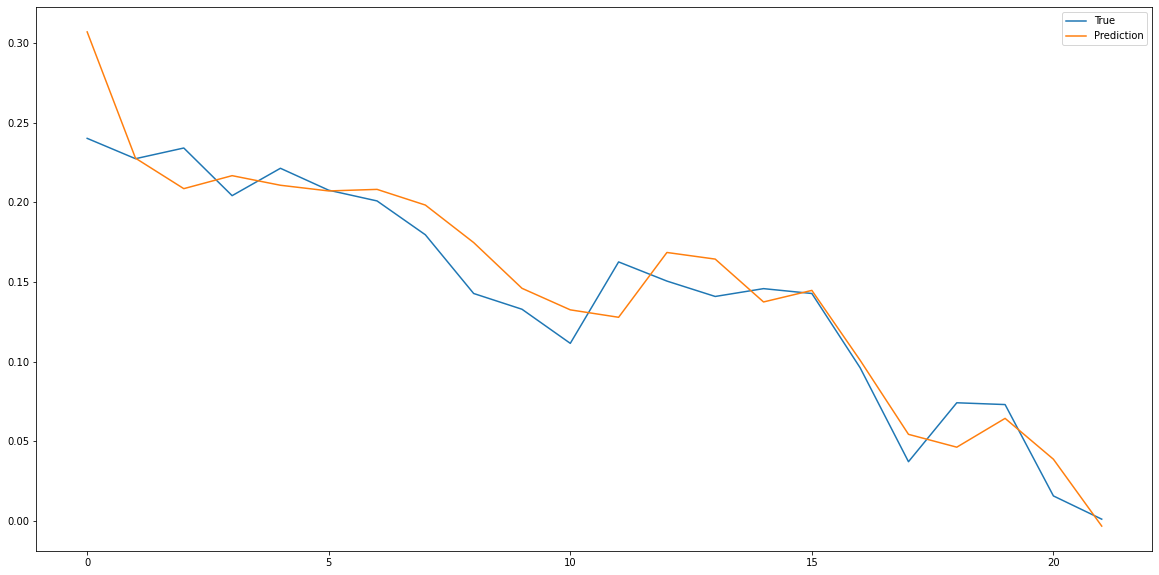

In [25]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()